### Cargamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv"
data = pd.read_csv(url)

In [3]:
data = data.replace({"-": 0})         ##Reemplazamos los valores -  con un 0
data = data.replace(np.nan, 0)        ##Reemplazamos los valores no existentes con un 0

In [4]:
for col in data.columns:              ## Cambiamos el tipo de data
    if col != "Region" and col != "Poblacion":
        data[col] = data[col].astype(int)

## Mostramos la Información entregada por el ministerios de Ciencia
* Los valores que están en 0 fueron transformados desde valores no entregados como "-" o NaN. Para un mejor trabajo de los datos. EN NINGUN CASO SIGNIFICA QUE EN ESOS DIAS SE HICIERON 0 TEST POR REGIÓN.

In [5]:
data

,Region,Codigo region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27
0,Arica y Parinacota,15,252110,70,0,93,103,0,93,24,...,135,78,93,88,182,157,76,160,159,81
1,Tarapacá,1,382773,0,0,0,0,0,0,0,...,284,269,121,361,342,347,335,365,586,314
2,Antofagasta,2,691854,182,128,107,175,103,95,117,...,345,290,386,396,259,344,224,347,218,165
3,Atacama,3,314709,57,52,60,25,20,22,25,...,143,98,86,133,154,133,99,83,175,261
4,Coquimbo,4,836096,0,0,0,0,0,0,0,...,205,308,128,167,202,221,227,210,214,138
5,Valparaíso,5,1960170,301,249,248,273,223,92,385,...,545,529,616,631,358,975,547,575,599,694
6,Metropolitana,13,8125072,5383,3185,2105,3861,1850,1656,2694,...,11992,10754,7285,11345,10626,9725,8696,10330,8874,8632
7,O’Higgins,6,991063,68,0,74,0,74,30,30,...,349,143,143,102,115,230,0,233,112,0
8,Maule,7,1131939,397,219,0,341,113,160,0,...,270,892,477,0,533,332,385,286,434,291
9,Ñuble,16,511551,364,0,259,189,65,0,0,...,834,0,657,0,372,283,0,573,129,281


## Cantidad de tests totales realizados a lo largo del tiempo en el pais

In [6]:
fechas = data.columns[(data.columns != 'Region') & (data.columns != 'Poblacion') & (data.columns != "Codigo region")]

In [7]:
X = []
Y = []
for fecha in fechas:
    total = data[fecha].sum()
    Y.append(total)
    X.append(fecha)

In [8]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 1),
            textcoords="offset points",
            ha ='center', va='bottom')

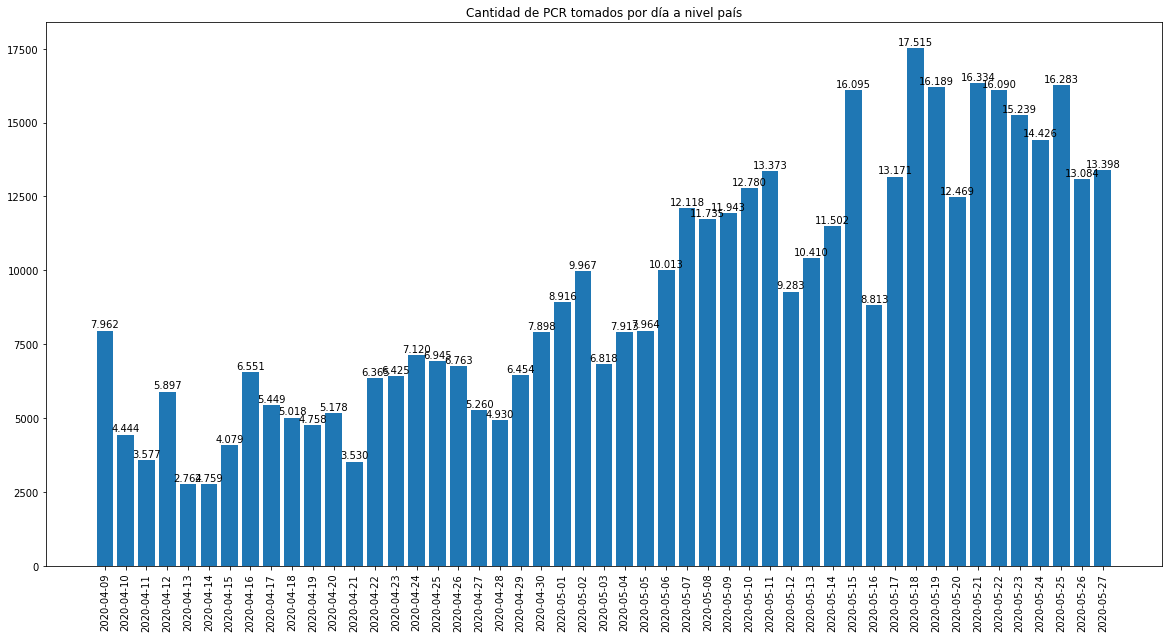

In [9]:
plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xticks(X, rotation='vertical')
plt.title("Cantidad de PCR tomados por día a nivel país")
labelonbars(X, Y)
plt.show()

## Cantidad total de test por región

In [10]:
total_por_region =  data[fechas].sum(axis=1).to_list()
Y                =  total_por_region
X                =  data["Region"].to_list()

In [11]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(Y[i], X[i]),
            xytext =(25, -5),
            textcoords="offset points",
            ha ='center', va='bottom')

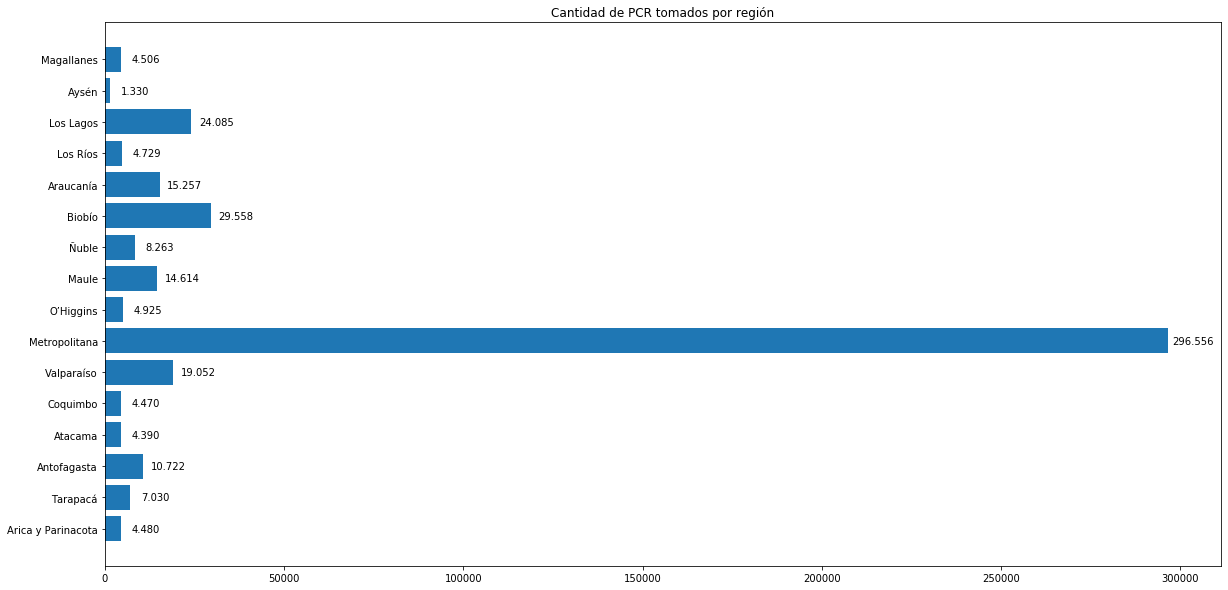

In [12]:
plt.figure(figsize=(20,10))
plt.barh(X,Y)
plt.title("Cantidad de PCR tomados por región")
labelonbars(X, Y)
plt.show()

## Porcentaje de test positivos por día

### Creamos el dataframe de |fecha | PCRS|

In [13]:
pcr_totales = data[fechas].sum().values.tolist()

In [14]:
df_pcr_totales = pd.DataFrame({
                                'Fecha': fechas,
                                'PCRS': pcr_totales
                                })

In [15]:
df_pcr_totales.tail(5)

,Fecha,PCRS
44,2020-05-23,15239
45,2020-05-24,14426
46,2020-05-25,16283
47,2020-05-26,13084
48,2020-05-27,13398


### Creamos el dataframe |Fecha|Cantidad de positivos|

In [16]:
url        = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data_total = pd.read_csv(url)
positivos  = data_total[data_total["Fecha"] == "Casos nuevos totales"]
positivos

,Fecha,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27
6,Casos nuevos totales,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,2278,3520,4038,3964,4276,3536,3709,4895,3964,4328


In [17]:
fecha_positivos = positivos.columns[1:]
test_positivos  = positivos.values.tolist()[0][1:]
df_positivos    = pd.DataFrame({
                                'Fecha': fecha_positivos,
                                'Positivos': test_positivos
                                })

In [18]:
df_positivos.tail(5)

,Fecha,Positivos
81,2020-05-23,3536.0
82,2020-05-24,3709.0
83,2020-05-25,4895.0
84,2020-05-26,3964.0
85,2020-05-27,4328.0


### Unimos los dataframe

In [19]:
df = pd.merge(df_pcr_totales, df_positivos, on='Fecha')

In [20]:
df["Porcentaje de positivos"] = ((df["Positivos"]*100) / df["PCRS"])

In [21]:
df.tail(5)

,Fecha,PCRS,Positivos,Porcentaje de positivos
44,2020-05-23,15239,3536.0,23.203622
45,2020-05-24,14426,3709.0,25.710523
46,2020-05-25,16283,4895.0,30.062028
47,2020-05-26,13084,3964.0,30.296545
48,2020-05-27,13398,4328.0,32.303329


## Porcentaje de test positivos a lo largo del tiempo

In [22]:
X = df["Fecha"].values.tolist()
Y = df["Porcentaje de positivos"].values.tolist()

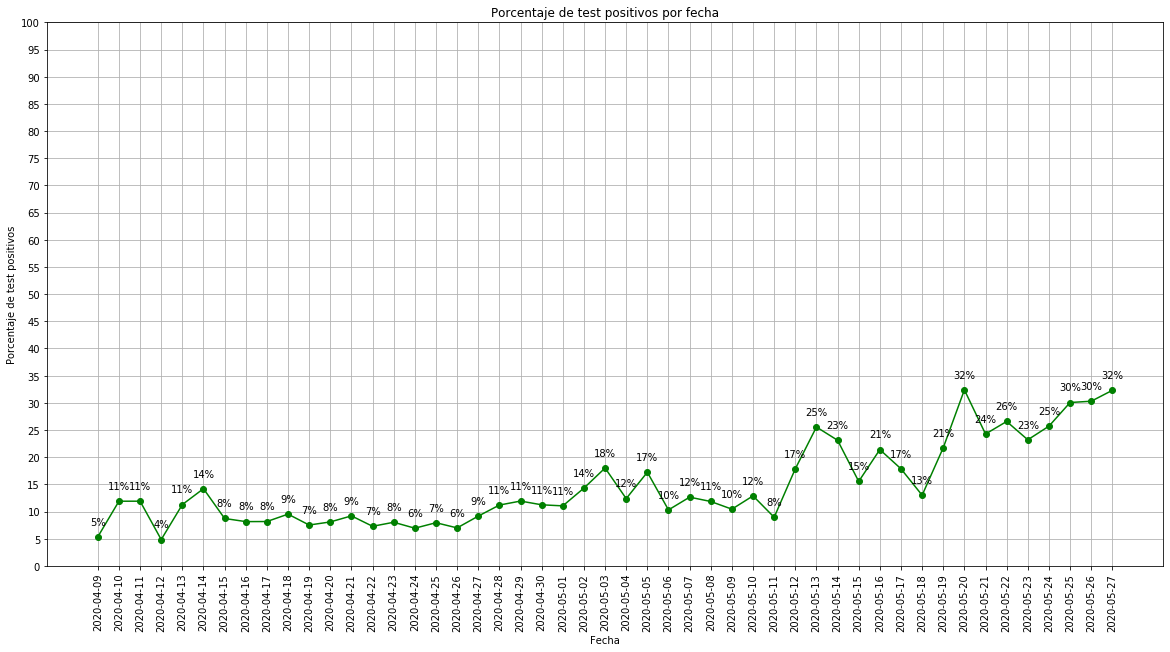

In [23]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        number = str(number) + "%"
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
plt.figure(figsize=(20,10))
plt.plot(X, Y, 'go-')
labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel("Porcentaje de test positivos")
plt.title("Porcentaje de test positivos por fecha")
plt.grid()
plt.xticks(X, rotation='vertical')
plt.yticks(np.arange(0, 105, 5))
plt.show()

### Testo tomados vs test positivos

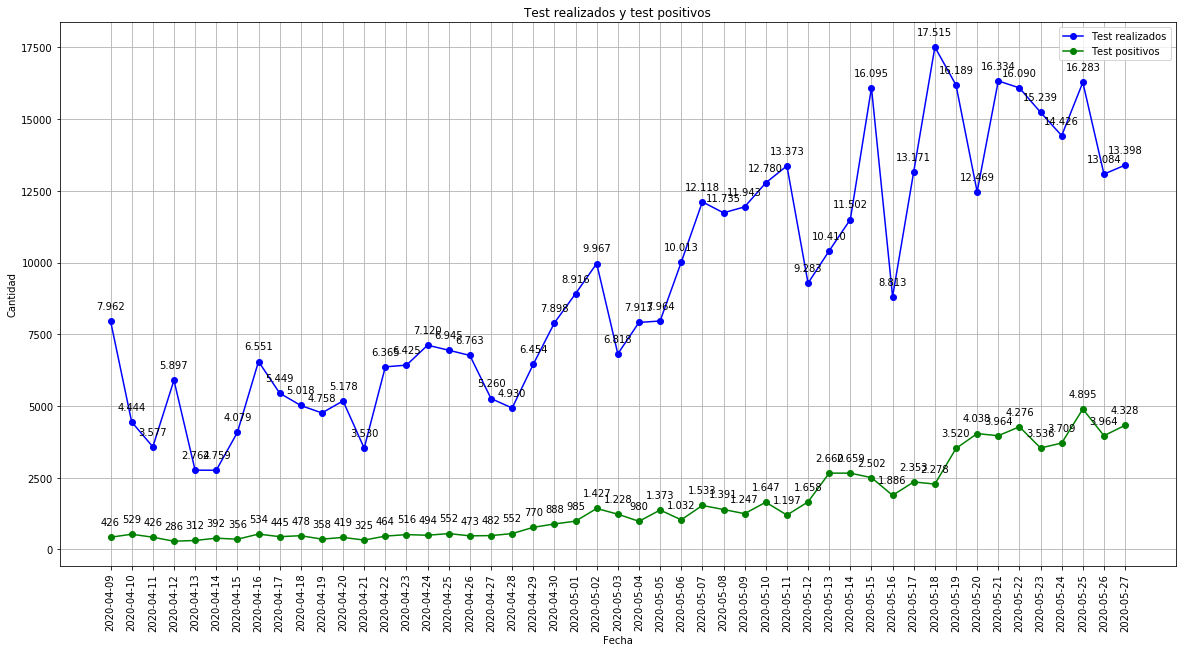

In [24]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        number = str(number)
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
plt.figure(figsize=(20,10))
plt.plot(df["Fecha"], df["PCRS"], 'bo-')
labelonbars(df["Fecha"], df["PCRS"])

plt.plot(df["Fecha"], df["Positivos"], 'go-')
labelonbars(df["Fecha"], df["Positivos"])

plt.xlabel('Fecha')
plt.ylabel("Cantidad")
plt.title("Test realizados y test positivos")
plt.grid()
plt.xticks(df["Fecha"], rotation='vertical')
plt.legend(["Test realizados", "Test positivos"])
plt.show()